In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio
import json
import copy

In [107]:
img_size = (600, 900)

In [4]:
myself = skio.imread("myself.jpg")
  
myself = sk.img_as_float(myself)

In [9]:
jay = skio.imread("Jay.jpg")
  
jay = sk.img_as_float(jay)

In [66]:
with open('myself_Jay.json', 'r') as json_file:
    # Load the JSON data into a Python variable
    correspondence = json.load(json_file)

In [15]:
print(correspondence.keys())

dict_keys(['im1_name', 'im2_name', 'im1Points', 'im2Points'])


In [43]:
im1_points = correspondence['im1Points']
im2_points = correspondence['im2Points']

In [18]:
print(im1_points)

[[230, 355], [238, 487], [397, 342], [389, 505], [565, 358], [552, 513], [642, 550], [627, 767], [574, 620], [510, 590], [451, 620], [504, 646], [419, 772], [379, 806], [317, 767], [328, 614], [264, 568], [210, 591], [262, 614], [142, 582], [139, 658], [302, 762], [190, 876], [294, 876], [382, 853], [469, 887], [368, 927], [299, 991], [388, 1022], [476, 990], [588, 884]]


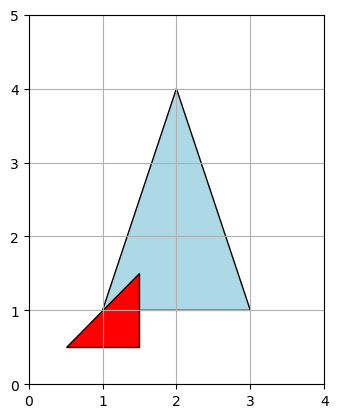

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the three points of the triangle
point1 = (1, 1)
point2 = (3, 1)
point3 = (2, 4)

new_point1 = (1,1)
new_point2 = (3,1)
new_point3 = (3,3)

old_matrix = np.array([[1,3,2],
                      [1,1,4],
                     [1,1,1]])
new_matrix = np.array([[1,3,3],
                     [1,1,3],
                     [1,1,1]])
T = new_matrix  @ np.linalg.inv(old_matrix)
temp = 0.5 *T @ old_matrix
add_p1 = (temp[0,0], temp[1,0])
add_p2 = (temp[0,1], temp[1,1])
add_p3 = (temp[0,2], temp[1,2])

add_points = [add_p1, add_p2, add_p3]

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Define the triangle as a polygon
triangle = patches.Polygon([point1, point2, point3], closed=True, edgecolor='black', facecolor='lightblue')

new_triangle =  patches.Polygon([new_point1, new_point2, new_point3], closed=True, edgecolor='black', facecolor='red')

add_triangle = patches.Polygon(add_points, closed=True, edgecolor='black', facecolor='red')
# Add the triangle to the axis
ax.add_patch(triangle)
# ax.add_patch(new_triangle)
ax.add_patch(add_triangle)

# Set axis limits (optional)
ax.set_xlim(0, 4)
ax.set_ylim(0, 5)

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
plt.grid(True)  # Add a grid (optional)
plt.show()

In [42]:
import skimage as ski

r = np.array([4, 1, 4])

c = np.array([1, 2, 3])

rr, cc = ski.draw.polygon(r, c)

img = np.zeros((6, 5), dtype=int)

img[rr, cc] = 1

img

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [75]:
def get_mask(vertices,height,width):
    mask = np.zeros((height, width), dtype=int)
    r = []
    c = []
    for vertice in vertices:
        temp_r = vertice[1]
        temp_c = vertice[0]
        r.append(temp_r)
        c.append(temp_c)
    rr, cc = ski.draw.polygon(r, c)
    mask[rr, cc] = 1 
    return mask

In [31]:
!pip install triangle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 259.7 kB/s eta 0:00:00m eta 0:00:010:02:04


{'vertices': array([[1., 1.],
       [3., 1.],
       [2., 4.]]), 'vertex_markers': array([[1],
       [1],
       [1]], dtype=int32), 'triangles': array([[0, 1, 2]], dtype=int32)}


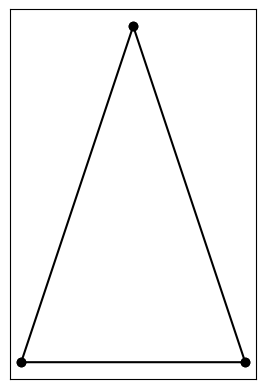

In [37]:
import triangle
import matplotlib.pyplot as plt

# Define your input points as a list of (x, y) coordinates
points = [(0, 0), (1, 0), (0.5, 1), (0.25, 0.5), (0.75, 0.5)]
points = [(1,1),(3,1),(2,4)]

# Perform Delaunay triangulation
triangles = triangle.triangulate({'vertices': points}, 'qa')

print(triangles)
# The result is a dictionary with information about the triangulation
# Extract triangles' vertices from the result
triangles_vertices = triangles['vertices']

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Plot the triangles
triangle.plot(ax, **triangles)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.show()

In [67]:
im1_points = correspondence['im1Points']
im2_points = correspondence['im2Points']

In [68]:
print(im1_points)

[[180, 204], [188, 299], [320, 192], [309, 327], [442, 206], [444, 333], [498, 301], [516, 403], [543, 395], [511, 534], [454, 421], [409, 390], [359, 415], [403, 432], [459, 644], [370, 624], [351, 541], [305, 546], [254, 532], [310, 405], [256, 408], [216, 367], [161, 390], [211, 409], [117, 497], [156, 625], [240, 619], [307, 600], [307, 656], [307, 725], [404, 694], [208, 683], [421, 808], [199, 793], [11, 688], [579, 758]]


In [69]:
print(im2_points)

[[174, 170], [200, 275], [296, 166], [303, 285], [404, 171], [404, 276], [443, 241], [463, 313], [495, 300], [458, 422], [416, 328], [378, 312], [341, 336], [379, 339], [433, 477], [374, 473], [350, 407], [315, 415], [270, 413], [314, 336], [263, 336], [233, 317], [199, 334], [233, 342], [144, 434], [176, 508], [259, 481], [320, 455], [316, 497], [320, 563], [389, 536], [222, 543], [405, 650], [216, 644], [10, 693], [573, 609]]


In [70]:
im2_points = im2_points + [[0,0],[599,899],[599,0],[0,899]]

In [72]:
im1_points = im1_points + [[0,0],[599,899],[599,0],[0,899]]

{'vertices': array([[174., 170.],
       [200., 275.],
       [296., 166.],
       [303., 285.],
       [404., 171.],
       [404., 276.],
       [443., 241.],
       [463., 313.],
       [495., 300.],
       [458., 422.],
       [416., 328.],
       [378., 312.],
       [341., 336.],
       [379., 339.],
       [433., 477.],
       [374., 473.],
       [350., 407.],
       [315., 415.],
       [270., 413.],
       [314., 336.],
       [263., 336.],
       [233., 317.],
       [199., 334.],
       [233., 342.],
       [144., 434.],
       [176., 508.],
       [259., 481.],
       [320., 455.],
       [316., 497.],
       [320., 563.],
       [389., 536.],
       [222., 543.],
       [405., 650.],
       [216., 644.],
       [ 10., 693.],
       [573., 609.],
       [  0.,   0.],
       [599., 899.],
       [599.,   0.],
       [  0., 899.]]), 'vertex_markers': array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       

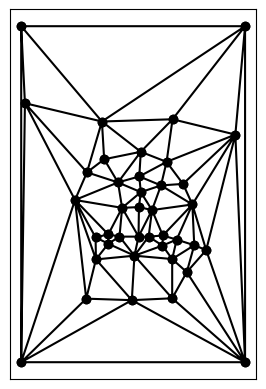

In [89]:
import triangle
import matplotlib.pyplot as plt

points = im2_points

# Perform Delaunay triangulation
triangles = triangle.triangulate({'vertices': points})

print(triangles)
print(len(triangles['vertices']))
triangle_index = triangles['triangles']
# The result is a dictionary with information about the triangulation
# Extract triangles' vertices from the result
triangles_vertices = triangles['vertices']

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Plot the triangles
triangle.plot(ax, **triangles)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.show()

In [118]:
transition_matrix_1 = []


In [119]:
transition_matrix_2 = []


In [120]:
mask = []

In [121]:
interpolation_coeff = 0.5

In [93]:
im1_points = np.array(im1_points)
im2_points = np.array(im2_points)

In [128]:
print(type(np.array([1])) == "<class 'numpy.ndarray'>")

False


In [ ]:
aaa = 

In [140]:
mid_points = []
for i in range(len(im1_points)):
    temp_point_x = int((1-interpolation_coeff)*im1_points[i][0] + interpolation_coeff*im2_points[i][0])
    temp_point_y = int((1-interpolation_coeff)*im1_points[i][1] + interpolation_coeff*im2_points[i][1])
    mid_points.append([temp_point_x,temp_point_y])
mid_points = np.array(mid_points)

In [133]:
for i in range(len(triangle_index)):
    index = triangle_index[i]
    mid_x = []
    mid_y = []
    x_1 = []
    x_2 = []
    y_1 = []
    y_2 = []
    for j in range(3):
        mid_x.append((1-interpolation_coeff)*im1_points[index[j]][0] + interpolation_coeff * im2_points[index[j]][0])
        mid_y.append((1-interpolation_coeff)*im1_points[index[j]][1] + interpolation_coeff * im2_points[index[j]][1])
        x_1.append(im1_points[index[j]][0])
        y_1.append(im1_points[index[j]][1])
        x_2.append(im2_points[index[j]][0])
        y_2.append(im2_points[index[j]][1])
    mid_point_matrix = np.array([mid_x, mid_y,[1,1,1]])
    point_1_matrix = np.array([x_1, y_1,[1,1,1]])
    point_2_matrix = np.array([x_2, y_2,[1,1,1]])
    temp1 = point_1_matrix @ np.linalg.inv(mid_point_matrix)
    temp2 = point_2_matrix @ np.linalg.inv(mid_point_matrix)
    transition_matrix_1.append(copy.copy(temp1))
    transition_matrix_2.append(copy.copy(temp2))
    temp_mask = get_mask(np.stack((mid_x,mid_y),axis=1),img_size[1],img_size[0])
    if type(mid_points) == type(None):
        mid_points = np.stack((mid_x,mid_y))
    else:
        mid_points = np.concatenate((mid_points,np.stack((mid_x,mid_y))),axis=0)
    mask.append(temp_mask)

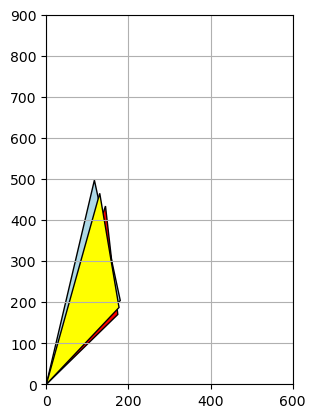

In [148]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the three points of the triangle
point1 = (1, 1)
point2 = (3, 1)
point3 = (2, 4)

new_point1 = (1,1)
new_point2 = (3,1)
new_point3 = (3,3)




add_points = [add_p1, add_p2, add_p3]

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Define the triangle as a polygon
triangle = patches.Polygon(im1_points[triangle_index[0]], closed=True, edgecolor='black', facecolor='lightblue')

new_triangle =  patches.Polygon(im2_points[triangle_index[0]], closed=True, edgecolor='black', facecolor='red')

add_triangle =  patches.Polygon(mid_points[triangle_index[0]], closed=True, edgecolor='black', facecolor='yellow')

# Add the triangle to the axis
ax.add_patch(triangle)
ax.add_patch(new_triangle)
ax.add_patch(add_triangle)


# Set axis limits (optional)
ax.set_xlim(0, 600)
ax.set_ylim(0, 900)

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
plt.grid(True)  # Add a grid (optional)
plt.show()

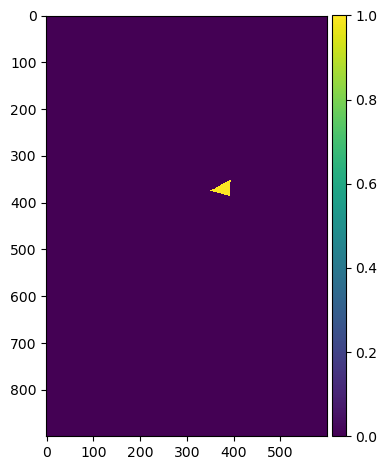

In [153]:
skio.imshow(mask[40])

In [154]:
print(mask[0].shape)

(900, 600)


In [159]:
print(mask[40])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [165]:
mid_image = np.zeros((img_size[1], img_size[0],3))

In [164]:
print(img_size[1])

900


In [173]:
def check_boundary(x,y, width=img_size[0], height=img_size[1]):
    if x<0 or x >= height:
        return False
    if y<0 or y >= width:
        return False
    return True

In [168]:
img1 = myself
img2 = jay

In [172]:
print(img2.shape)

(900, 600, 3)


In [174]:
for i in range(len(triangle_index)):
    index = triangle_index[i]
    for j in range(img_size[1]):
        for k in range(img_size[0]):
            if mask[i][j,k] == 1:
                temp_1 = transition_matrix_1[i] @ np.array([j,k,1])
                x_1 = int(temp_1[0])
                y_1 = int(temp_1[1])
                temp_2 = transition_matrix_2[i] @ np.array([j,k,1])
                x_2 = int(temp_1[0])
                y_2 = int(temp_1[1])
                if check_boundary(x_1, y_1) and check_boundary(x_2,y_2):
                    for l in range(3):
                        mid_image[j,k,l] =  (1-interpolation_coeff)*img1[x_1,y_1,l] + interpolation_coeff*img2[x_2,y_2,l]
    

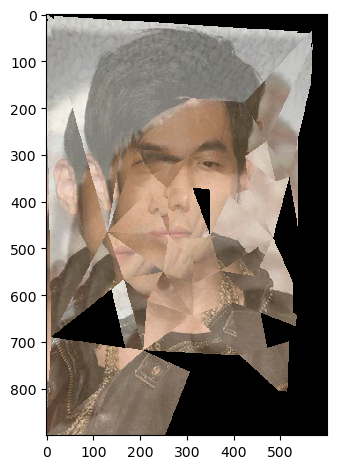

In [175]:
skio.imshow(mid_image)

In [2]:
!pip install pydub

In [3]:
from pydub import AudioSegment

/home/yihua/anaconda3/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [7]:
asf_file_path = "01-1m.asf"
audio = AudioSegment.from_file(asf_file_path, format="asf")

CouldntDecodeError: Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-lv2 --enable-omx --enable-openal --enable-opencl --enable-opengl --enable-sdl2 --enable-pocketsphinx --enable-librsvg --enable-libmfx --enable-libdc1394 --enable-libdrm --enable-libiec61883 --enable-chromaprint --enable-frei0r --enable-libx264 --enable-shared
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.100
  libavfilter     7.110.100 /  7.110.100
  libswscale      5.  9.100 /  5.  9.100
  libswresample   3.  9.100 /  3.  9.100
  libpostproc    55.  9.100 / 55.  9.100
01-1m.asf: Invalid data found when processing input
